<img style="float: right" src="https://www.mc.vanderbilt.edu/documents/lmsa/images/VMS_Logo.png">

# Bayesian Meta-analysis Webinar

### Christopher Fonnesbeck, Vanderbilt University School of Medicine

#### 28 May 2015

---

The primary goal of this presentation is to give an overview on Bayesian inference, and in particular, on how to employ **probabilistic programming** to apply Bayesian methods to meta-analysis. Though this approach to statistical modeling has become more prevalent in the past two decades, and though it has several strengths that make it ideal for meta-analytic modeling, one of the largest obstacles for widespread adoption is the requirement for proficiency in computational methods in order to adopt them. The same off-the-shelf software that is used to conduct classical or frequentist analyses are generally not capable of running Bayesian analysis well.

Hence, in the next hour I will provide a link between the *theory* of Bayesian statistics and the *practice* of building Bayesian models, using probabilistic programming. The outline is as follows:

### 1. Introduction to Bayesian Statistical Analysis

Incase you are poorly acquainted with the Bayesian approach to statistical analysis, I will provide a very brief overview, with links to additional, more comprehensive reference material. This is intended to motivate the use of probabilistic programming tools for conducting meta-analysis.

### 2. A Primer on Programming using Python

Applying Bayesian methods to analyzing data effectively requires being able to write high-level software programs. While adding a level of complexity to the analysis procedure, this typically results in a more powerful avenue for analyzing data. The good news is there are several scientific programming languages available today that make coding and analysis much easier than with the previous generation of tools. We will learn the basics of these languages, Python, sufficiently to build and run a simple model.

### 3. Using Probabilistic Programming to Construct Bayesian Models for Meta-analysis

With theory in one hand and a powerful programming language in another, we will employ the probabilistic progrmaming paradigm to specify a meta-analysis. This will be done using a Python data analysis package called `PyMC`. We will step through the preparation of the data, encoding the model in software, then running the model and inspecting the output.

## Webinar materials

This webinar is presented using an [IPython Notebook](http://ipython.org/notebook.html), an HTML-based, interactive programming environment for the Python programming language that allows text and other media to be integrated with code. I have placed the notebooks, which can be run interactively or viewed as a static web page, on a GitHub repository. It can be viewed or downloaded here:

[https://github.com/fonnesbeck/AHRQ_Complex_Interventions](https://github.com/fonnesbeck/AHRQ_Complex_Interventions)

# Bayesian Statistical Analysis

Though many of you will have taken a statistics course or two during your undergraduate (or graduate) education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely different paradigm for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn. *-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

## Bayesian vs Frequentist Statistics: What's the difference?

![can of worms](images/can-of-worms.jpg)

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about the parameters.
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

![Fisher](images/fisher.png)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> \\[\hat{p} = \frac{y}{n}\\]
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/database they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayesian Inference, in 3 Easy Steps

![123](images/123.png)

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps.

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Why be Bayesian?

At this point, it is worth addressing the question of why one might consider an alternative statistical paradigm to the classical/frequentist statistical approach. After all, it is not always easy to specify a full probabilistic model, nor to obtain output from the model once it is specified. So, why bother?

> ... the Bayesian approach is attractive because it is useful. Its usefulness derives in large measure from its simplicity. Its simplicity allows the investigation of far more complex models than can be handled by the tools in the classical toolbox.  
*-- Link and Barker 2010*

We already noted that there is just one estimator in Bayesian inference, which lends to its ***simplicity***. Moreover, Bayes affords a conceptually simple way of coping with multiple parameters; the use of probabilistic models allows very complex models to be assembled in a modular fashion, by factoring a large joint model into the product of several conditional probabilities.

Bayesian statistics is also attractive for its ***coherence***. All unknown quantities for a particular problem are treated as random variables, to be estimated in the same way. Existing knowledge is given precise mathematical expression, allowing it to be integrated with information from the study dataset, and there is formal mechanism for incorporating new information into an existing analysis.

Finally, Bayesian statistics confers an advantage in the ***iterpretability*** of analytic outputs. Because models are expressed probabilistically, results can be interpreted probabilistically. Probabilities are easy for users (particularly non-technical users) to understand and apply.

### Example: confidence vs. credible intervals

A commonly-used measure of uncertainty for a statistical point estimate in classical statistics is the ***confidence interval***. Most scientists were introduced to the confidence interval during their introductory statistics course(s) in college. Yet, a large number of users mis-interpret the confidence interval.

Here is the mathematical definition of a 95% confidence interval for some unknown scalar quantity that we will here call \\(\theta\\):

<div style="font-size:25px">
\\[Pr(a(Y) < \theta < b(Y) | \theta) = 0.95\\]
</div>

how the endpoints of this interval are calculated varies according to the sampling distribution of \\(Y\\), but for as an example, the confidence interval for the population mean when \\(Y\\) is normally distributed is calculated by:

\\[Pr(\bar{Y} - 1.96\frac{\sigma}{\sqrt{n}}< \theta < \bar{Y} + 1.96\frac{\sigma}{\sqrt{n}}) = 0.95\\]

It would be tempting to use this definition to conclude that there is a 95% chance \\(\theta\\) is between \\(a(Y)\\) and \\(b(Y)\\), but that would be a mistake. 

Recall that for frequentists, unknown parameters are **fixed**, which means there is no probability associated with them being any value except what they are fixed to. Here, the interval itself, and not \\(\theta\\) is the random variable. The actual interval calculated from the data is just one possible realization of a random process, and it must be strictly interpreted only in relation to an infinite sequence of identical trials that might be (but never are) conducted in practice.

A valid interpretation of the above would be:

> If the experiment were repeated an infinite number of times, 95% of the calculated intervals would contain \\(\theta\\).

This is what the statistical notion of "confidence" entails, and this sets it apart from probability intervals.

Since they regard unknown parameters as random variables, Bayesians can and do use probability intervals to describe what is known about the value of an unknown quantity. These intervals are commonly known as ***credible intervals***.

The definition of a 95% credible interval is:

<div style="font-size:25px">
\\[Pr(a(y) < \theta < b(y) | Y=y) = 0.95\\]
</div>

Notice that we condition here on the data \\(y\\) instead of the unknown \\(\theta\\). Thus, the endpoints are fixed and the variable is random. 

We are allowed to interpret this interval as:

> There is a 95% chance \\(\theta\\) is between \\(a\\) and \\(b\\).

Hence, the credible interval is a statement of what we know about the value of \\(\theta\\) based on the observed data.

## Probability

> *Misunderstanding of probability may be the greatest of all impediments to scientific literacy.*
> — Stephen Jay Gould

Because of its reliance on probabilty models, its worth talking a little bit about probability. There are three different ways to define probability, depending on how it is being used.

### 1. Classical probability

<div style="font-size:25px">
\\[Pr(X=x) = \frac{\text{# x outcomes}}{\text{# possible outcomes}}\\]
</div>

Classical probability is an assessment of **possible** outcomes of elementary events. Elementary events are assumed to be equally likely.

### 2. Frequentist probability

<div style="font-size:25px">
\\[Pr(X=x) = \lim_{n \rightarrow \infty} \frac{\text{# times x has occurred}}{\text{# independent and identical trials}}\\]
</div>

Unlike classical probability, frequentist probability is an EMPIRICAL definition. It is an objective statement desribing events that have occurred.

### 3. Subjective probability

<div style="font-size:25px">
\\[Pr(X=x)\\]
</div>

Subjective probability is a measure of one's uncertainty in the value of \\(X\\). It characterizes the state of knowledge regarding some unknown quantity using probability.

It is not associated with long-term frequencies nor with equal-probability events.

For example:

- X = the true prevalence of diabetes in Austin is < 15%
- X = the blood type of the person sitting next to you is type A
- X = the Nashville Predators will win next year's Stanley Cup
- X = it is raining in Nashville


## Bayes' Formula

The goal in Bayesian inference is to calculate the **posterior distribution** of our unknowns:

<div style="font-size: 150%;">  
\\[Pr(\theta|Y=y)\\]
</div>

This expression is a **conditional probability**. It is the probability of \\(\theta\\) *given* the observed values of \\(Y=y\\).

This posterior distribution is calculated using Bayes' formula:

![bayes formula](images/bayes_formula.png)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\), as expressed by the posterior distribution the posterior distribution.

The innocuous denominator \\(P(y)\\) cannot be calculated directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

### Priors

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta|y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is only through the likelihood. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

## Bayesian Updating

![Bayesian updating](http://d.pr/i/1by1M+)
*(via [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/))*

# Python Programming

## What is Python?

Python is:

* a modern, general-purpose programming language
* open-source 
* an *interpreted* language 

It is often compared to languages like R and Ruby. It offers the power and flexibility of lower level (*i.e.* compiled) languages, without the steep learning curve, and without most of the associated  pitfalls for new or non-expert users. The language is very clean and readable, and it is available for almost every modern computing platform.

![python](http://imgs.xkcd.com/comics/python.png)

*(via [xkcd](http://imgs.xkcd.com/comics/python.png))*

## Why use Python for scientific programming?

Python offers a number of advantages to scientists, both for experienced and novice programmers alike:

***Powerful and easy to use***  

* avoids the power/ease-of-use tradeoff
* clean, readable syntax
* rich standard library

***Interactive***  

* run interactively from the command line
* run non-interactiely with scripts
* IPython notebooks for reproducibility


***Extensible***  

* useful in mixed-language environments
* advanced users can write fast extensions using Fortran, C, or Cython


***Third-party modules***  

There is a vast body of Python modules created outside the auspices of the Python Software Foundation. These include utilities for database connectivity, mathematics, statistics, and charting/plotting. Some notables include:

* `NumPy`: array data structures and array operations.
* `SciPy`: set of high level science and engineering modules, including optimization, integration, special functions, signal and image processing, genetic algorithms, ODE solvers, and others.
* `Matplotlib`: 2D plotting library for publication-quality figures.
* `Pandas`: high-performance, easy-to-use tabular data structures and data analysis tools. In particular, the `DataFrame` class is useful for spreadsheet-like representation and mannipulation of data. Also includes high-level plotting functionality.
* `IPython`: enhanced Python shell, designed to increase the efficiency and usability of coding, testing and debugging.

***Free and open***  

Python is released on all platforms under the GNU public license, meaning that the language and its source is freely distributable. Not only does this keep costs down for scientists and universities operating  under a limited budget, but it also frees programmers from licensing concerns for any software they may develop.

## Getting Started

Let's look at some Python code, beginning with the simplest possible operation: assignment of values to variables. Let's create a variable called `weight_kg` (its nice to give your variables meaningful names!) and assign it a particular value.

In [1]:
weight_kg = 79.5

All we have done here is created a "label" and bound a particular value to it. We can take a look at the current value of `weight_kg`:

In [2]:
weight_kg

79.5

If we want to know what kind of variable this is, the `type` function will give us this information. We **call** a function by following the function name with parentheses that enclose any relevant **arguments** the function may need to operate.

In [3]:
type(weight_kg) 

float

We may also use the `print` function to report the value of `weight_kg` in a meaningful way:

In [4]:
print('My weight in kilograms is', weight_kg)

My weight in kilograms is 79.5


We might now use an arithmetic operator on our variable to create a new one:

In [5]:
weight_lbs = weight_kg * 2.2

weight_lbs

174.9

Variables in Python are **dynamically typed**, which means that unlike many languages you do not have to pre-specify what kind of variable you need; it automatically figures out the type for you. Moreover, if you want to use the variable to hold another kind of variable, you can.

In [6]:
weight_kg = 'none of your business!'

weight_kg

'none of your business!'

In [7]:
type(weight_kg)

str

In order to use Python for data analysis, we need a more general data structure, since we will be dealing with entire datasets, and we do not wish to assign each value to individual variables. The simplest such *vector-valued* data structure is the Python **list**, which is specified by surrounding comma-separated value with square braces. 

Let's look at a list of data, which we will use later in an example analysis. These are the occurrences of deaths during cardiac surgery procedures at 12 different hospitals.

In [8]:
deaths = [2, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24]

We may want to know how many items are in this list:

In [9]:
len(deaths)

12

We may wish to look at the first item of the list only:

In [10]:
deaths[0]

2

The square brackets are used to pass an index (or set of indices) to the list. Notice that the first item is indexed by zero, rather than by one. 

Or, we may wish to look at the first 4 values of the list only:

In [11]:
deaths[:4]

[2, 18, 8, 46]

The colon specifies a sqeuence from a to b by `a:b`. If `a` is omitted, it assumes to begin at the start of the list, and if `b` is omitted, it assumes to end at the end of the list. In fact, one way to generate a copy of the list is to pass it a colon, all by itself.

In [12]:
deaths[:]

[2, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24]

We can use indices to **replace** values in a list, as well as just to look at them. For example, there is an error in this dataset: the number of deaths at the first (index zero!) hospital should be zero rather than two. We can fix this by assigning zero to the indexed element:

In [13]:
deaths[0] = 0

We may wish to perform an operation on each of the elements of the data list. The simplest way to do this is to construct a **loop** and execute the operation on each element, in turn. We can do this using a `for` loop.

In [14]:
for x in deaths:
    x2 = x**2
    print(x2)

0
324
64
2116
64
169
81
961
196
64
841
576


The `for` loop above assigns each of the values in `deaths` to the variable `x` in order from beginning to end. The loop includes any statements after the colon that are indented; there is no need for brackets, as you see in most other programming languages, making the code easy to read.  So, for each element, the value is squared (using the `**` power operator) and assigned to a new variable `x2`, then this value is printed before moving on to the next item in the list.

Notice a couple of things here: we did not have to use explicit indexes, counting from zero to eleven, as you might have expected, to obtain each of the values in `deaths` (though we could have!). This is because Python lists are **iterable**, which means control structures like `for` loops know how to extract each element from it, as needed.

If we wanted to save these values to a new list, we would have to initialize an empty list and populate it using the `for` loop, using the `append` method for lists. 

> A **method** is just a function that is associated with a particular Python object

Here is what that looks like:

In [15]:
# Initialize an empty list
deaths_squared = []

for x in deaths:
    deaths_squared.append(x**2)
    
deaths_squared

[0, 324, 64, 2116, 64, 169, 81, 961, 196, 64, 841, 576]

Consider what we would have to do in order to calculate the *rate* of mortality for the procedure, by dividing each death count by the number of surgeries performed in each hospital ...

In [16]:
surgeries = [47, 148, 119, 810, 211, 196, 148, 215, 207, 97, 256, 360]

Somehow we would have to iterate, pair-wise, over both lists and divide one element by the other. We could do this with the help of a useful Python function called `zip`, which iterates over two iterables, pair-wise:

In [17]:
death_rate = []

for x,n in zip(deaths, surgeries):
    death_rate.append(x/n)
    
death_rate

[0.0,
 0.12162162162162163,
 0.06722689075630252,
 0.056790123456790124,
 0.037914691943127965,
 0.0663265306122449,
 0.060810810810810814,
 0.14418604651162792,
 0.06763285024154589,
 0.08247422680412371,
 0.11328125,
 0.06666666666666667]

For more advanced manipuation of vector-valued variables, it is recommended that we move away from Python's built-in lists to the more capable `ndarray` structure that is provided by the Numpy package.

In [18]:
import numpy

deaths_array = numpy.array(deaths)
deaths_array

array([ 0, 18,  8, 46,  8, 13,  9, 31, 14,  8, 29, 24])

In [19]:
surgeries_array = numpy.array(surgeries)
type(surgeries_array)

numpy.ndarray

One of the many useful features of the Numpy array is that it performs element-wise operations, avoiding the need to explicitly loop over its elements.

In [20]:
deaths_array**2

array([   0,  324,   64, 2116,   64,  169,   81,  961,  196,   64,  841,
        576])

In [21]:
deaths_array/surgeries_array

array([ 0.        ,  0.12162162,  0.06722689,  0.05679012,  0.03791469,
        0.06632653,  0.06081081,  0.14418605,  0.06763285,  0.08247423,
        0.11328125,  0.06666667])

# Probabilistic Programming with PyMC

Beyond the basics of Python programming, our goal here is to expose you to **probabilistic programming**, and how it can be used to build Bayesian statistical models.

![PPL](http://d.pr/i/16Rz5+)

The practical difference between probabilistic programming and standard computer programming is that rather than being able to assign simple numeric values (or other data types) to variables, probabilistic programming allows entire probability distributions to be assigned to variables, and manipulated.

***Why is this relevant?*** In Bayesian inference, recall that we are compelled to specify a *full probability model* that assigns probability distributions to all unknown quantities, in a way that represents our current belief in the possible values that they may take. How do we represent this in computer code? Using a probabilistic programming language, we can simply assign a distribution to a variable.

For example, consider the mortality rate for infant cardiac surgeries above; since it is a value constrained to be between zero and one, we might use a **beta distribution**.

![beta](http://d.pr/i/19sPw+)

For example, one choice might be:

\\[\text{rate} \sim \text{Beta}(1, 1)\\]

This parameterization assigns equal probability to all possible values on the unit interval. Here are some sample values from a `Beta(1,1)` distribution using Numpy's `random` module:

In [22]:
samples = numpy.random.beta(1, 1, size=1000)

We can easily look at the distribution of the resulting samples, using `distplot` from the Seaborn package.

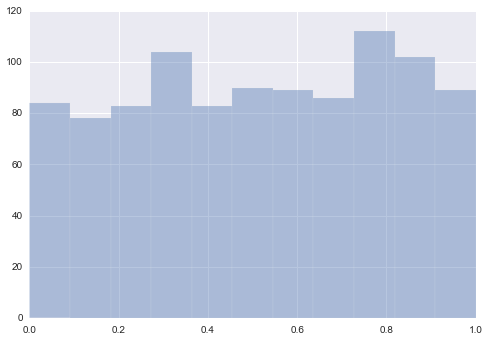

In [23]:
%matplotlib inline
from seaborn import distplot

distplot(samples, kde=False)

In a probabilistic programming framework, we would be able to assign a beta distribution to a particular parameter, and combine it with other parameters and data in order to provide inference.

Python is not by itself a probabilistic language, but the PyMC package provides this functionality.

In [24]:
from pymc import Beta

rate = Beta('rate', alpha=1, beta=1)

PyMC includes classes of objects that represent most of the common statistical distributions. We can create variables representing these probabilities by passing it a name and the appropriate parameters.

The `rate` object above is now an *instance* of a stochastic random variable that follows a beta distribution. It is given a value (drawn randomly if none is specified):

In [25]:
rate.value

array(0.8425899166032903)

We can sample new values from it:

In [26]:
rate.random()

0.013788704130416995

We can obtain the log-probability of the current value:

In [27]:
rate.logp

-4.440892098500626e-16

Most importantly, `rate` can be combined with other stochastic variables to specify a particular model. All PyMC objects will have **parents** that partly determine its value, in this case these are the beta parameters `alpha` and `beta` that were both assigned values of one.

In [28]:
rate.parents

{'alpha': 1, 'beta': 1}

The `parents` are stored in another standard Python data structure, called a `dictionary`. Dictionaries are sets of key-value pairs, for which the keys can be used to retrieve their corresponding values. So, if we want the value for a particular parent, we just index it by name (rather than by an array index).

In [29]:
rate.parents['beta']

1

Variables sometimes have **children** that, in turn, depend on their values. We have not specified any such relationship for `rate`, so it is just an empty set.

In [30]:
rate.children

set()

A `set` is yet another data structure that is like a dictionary, but consists only of values, and no corresponding keys.

How can we build a model with these components? Continuing with this simple example, we may want to use our `rate` object as a prior for an unknown rate that we wish to estimate. For example, we may want to estimate the mortality rate in the first hospital in our dataset.

There were zero deaths in 47 operations. A natural model for this type of **bounded count** data is a binomial distribution. So, we can use the `Binomial` class in PyMC to model the data from one hostpital. 

Let's use the `help` function to get the documentation for `Binomial`.

In [31]:
from pymc import Binomial

help(Binomial)

Help on class Binomial in module pymc.distributions:

class Binomial(pymc.PyMCObjects.Stochastic)
 |  B = Binomial(name, n, p, value=None, observed=False, size=1, trace=True, rseed=True, doc=None, verbose=-1, debug=False)
 |  
 |  Stochastic variable with Binomial distribution.
 |  Parents are: n, p.
 |  
 |  Docstring of log-probability function:
 |  
 |      Binomial log-likelihood.  The discrete probability distribution of the
 |      number of successes in a sequence of n independent yes/no experiments,
 |      each of which yields success with probability p.
 |  
 |      .. math::
 |          f(x \mid n, p) = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}
 |  
 |      :Parameters:
 |        - `x` : [int] Number of successes, > 0.
 |        - `n` : [int] Number of Bernoulli trials, > x.
 |        - `p` : Probability of success in each trial, :math:`p \in [0,1]`.
 |  
 |      .. note::
 |         - :math:`E(X)=np`
 |         - :math:`Var(X)=np(1-p)`
 |  
 |  Method resolution order:
 |      Bi

This provides a lot of information about this stochastic. You can see that there is a list of arguments, some which are associated with assigned values, and others that do not have assigned values. The former are called *keyword* arguments, and are optional; if values are not provided by the user, then the values shown in the documentation are passed as *default* values. You can see here that only three variables are required: `name`, `n` (the sample size), and `p` (the probability of an event).

We will use 47 for the sample size, `rate` as the probability (its true value is unknown), and 0 for the value.

In [32]:
d = Binomial('d', n=47, p=rate, value=0, observed=True)

Notice that we inclued a fifth argument, `oberved=True`. This is used to recognize that the particular value of this variable was observed (*i.e.* it comes from our dataset) and should not be changed. As with `rate`, which is an unobserved variable, we can sample from `d` but the value does not change.

In [33]:
d.random()

array(1)

In [34]:
d.value

array(0)

Let's now inspect some of the attributes of our variables:

In [35]:
rate.children

{<pymc.distributions.new_dist_class.<locals>.new_class 'd' at 0x10e7edf28>}

In [36]:
d.parents

{'n': 47,
 'p': <pymc.distributions.new_dist_class.<locals>.new_class 'rate' at 0x10c1f2a58>}

In our very simple model, `rate` is the prior distribution of the unknown variable, and `d` is the likelihood that provides the information from the data.

We can use one of several statistical methods to estimate the true value of `rate`. The simplest of these is the **maximum a posteriori (MAP)** estimate for the posterior. This simply uses optimization to seek out the value of `rate` that maximizes its posterior distribution. 

In [40]:
from pymc import MAP

model = MAP([rate, d])
model

We now have another PyMC object `MAP` that retains a method for fitting the unknown variables using MAP. We can initiate this using the `fit()` method:

In [38]:
model.fit()

When `fit` has completed, the value of `rate` will now be the MAP estimate.

In [39]:
rate.value

array(6.547924705230564e-12)

As we might expect, the estimate is very close to zero!

### Step 1: Specify Probability Model

### Step 2: Calculate Posterior Distribution of Parameters

### Step 3: Check the Model

## Alternatives

* [WinBUGS](http://www.openbugs.net/w/FrontPage) or [JAGS](http://mcmc-jags.sourceforge.net)
* [Stan](http://mc-stan.org)
* SAS ([PROC MCMC](http://support.sas.com/documentation/cdl/en/statug/63033/HTML/default/viewer.htm#statug_mcmc_sect019.htm))

---

## Bibliography

+ Gelman A, Carlin JB, Stern HS, Dunson DB, Vehtari A, Rubin DB. Bayesian Data Analysis, Third Edition. CRC Press; 2013.
+ Davidson-Pilon C, et al. [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()